In [1]:
import pandas as pd
from auxiliary.filter_functions import *
from auxiliary.search_algorithm import *
from results import *
from testing import *
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad, SimbadClass
import os
import glob
from astropy.table import Table
import numpy as np
from astropy.io import fits
import time
import matplotlib.pyplot as plt
from astropy.stats import poisson_conf_interval
import scipy

In [9]:
# Get the candidates with no matches within a certain date range

date_range = [
    # '',
    # '2015-01-01',
    '2022-04-01',
    ''
]

no_matches = get_no_match_fxts(20.0, from_date=date_range[0], to_date=date_range[1])
no_matches

,ObsId,RA,DEC,THETA,POS_ERR
8,23488,187.66173433407874,41.6360916527896,2.457,0.08753291125732836
11,28964,244.71649522184907,-1.991866011802935,6.134,0.360551429526109


In [1]:
# plot the light curves of the candidates with no matches
for i, fxt in no_matches.iterrows():
    pass
    # lc = gen_light_curve(
    #     fxt['ObsId'],
    #     float(fxt['RA']),
    #     float(fxt['DEC']),
    #     float(fxt['THETA']),
    # )
    # print(lc)
    # plot_light_curve(
    #     fxt['ObsId'],
    #     float(fxt['RA']),
    #     float(fxt['DEC']),
    #     float(fxt['THETA']),
    # )

NameError: name 'no_matches' is not defined

In [4]:
# get the criteria table for a certain date range like in the papers

date_range = [
    # '',
    # '2015-01-01',
    '2022-04-01',
    ''
]

criteria_table = get_criteria_table(from_date=date_range[0], to_date=date_range[1])

criteria_table

,Matched,Unique Matched,Removed,Remaining
Archival X-ray date,20,2,20,25
Cross-match with stars/Gaia,28,10,19,6
NED + SIMBAD + VizieR,20,2,4,2


In [5]:
# get table of number of observations, analysed observations, detections and no match detections

date_range = [
    # '',
    '2015-01-01',
    '2022-04-01',
    # ''
]

candidate_numbers = get_candidate_numbers(
    from_date=date_range[0], to_date=date_range[1])

candidate_numbers

,Total,Before,In,After
Observations,9799,4992,3311,1496
Analysed,9633,4833,3304,1496
Detections,1283,1034,204,45
Candidates no match,79,65,12,2


In [6]:
# generate and save random light curves to manually check detections

# random_detections, random_light_curves = get_random_light_curves(50, from_date='', to_date='')
# plot_random_light_curves(random_detections, random_light_curves)

In [4]:
# test a filter function on a given detection

detection = pd.DataFrame({
    'RA': 187.66173433407874,
    'DEC': 41.6360916527896,
    'POS_ERR': 0.08753291125732836
}, index=[0])

print(detection)

filter_Xray_binaries(detection.iloc[0], True)

           RA        DEC   POS_ERR
0  187.661734  41.636092  0.087533
  ID           Name          RAJ2000   DEJ2000    Flux    b_Flux   B_Flux  Flagp Flagu Flagn    c       LX      b_LX     B_LX  
                               deg       deg    mW / m2  mW / m2  mW / m2                            1e-07 W  1e-07 W  1e-07 W 
----- --------------------- --------- --------- -------- -------- -------- ----- ----- ----- ------- -------- -------- --------
41333 2CXO J123038.8+413810 187.66208  41.63614 2.29e-14 2.07e-14 2.51e-14     0     0     0 0.20090 2.51e+38 2.26e+38 2.75e+38


True

	q1 + q2: 120
	q3 + q4: 22
	q1 + q4: 100
	q2 + q3: 42
24604 - RA: 207.235, DEC: 26.662 - [6.367101619958878, 26.367101619958877]
	q1 + q2: 6
	q3 + q4: 68
	q1 + q4: 58
	q2 + q3: 16
24604 - RA: 207.235, DEC: 26.662 - [0.0, 10.0]


ValueError: 'yerr' (shape: (2,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (26,))

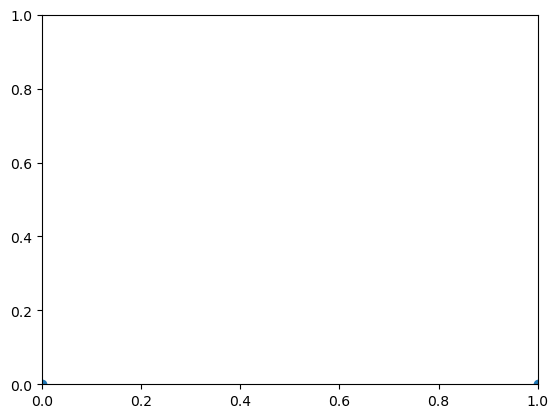

In [8]:
# test search algorithm for a single source

# obsid = 8490
# detections = get_detections(
#     str(obsid),
#     ra='',
#     dec=''
# )[0:1]

# or manually give source
# to check fxt in paper for example

detections = pd.DataFrame({
    'ObsId': ['24604'],
    'RA': ['207.23523'],
    'DEC': ['26.66230'],
    'THETA': ['7.08']
})

for index, detection in detections.iterrows():
    test_search_algorithm(
        detection['ObsId'],
        float(detection['RA']),
        float(detection['DEC']),
        float(detection['THETA'])
    )
    plot_light_curve(
        detection['ObsId'],
        float(detection['RA']),
        float(detection['DEC']),
        float(detection['THETA'])
    )

In [ ]:
# check if fxts from papers are found in new code
paper_I_fxts = [
    [803, 186.38125, 13.06607],
    [2025, 167.86792, 55.67253],
    [8490, 201.24329, -43.04060],
    [9546, 211.25113, 53.65706],
    [9548, 170.07296, 12.97189],
    [14904, 345.49250, 15.94871],
    [4062, 76.77817, -31.86980],
    [5885, 318.12646, -63.49914],
    [9841, 175.00504, -31.91743],
    [12264, 90.00450, -52.71501],
    [12884, 212.12063, -27.05784],
    [13454, 15.93558, -21.81272],
    [15113, 45.26725, -77.88095],
    [16454, 53.16158, -27.85940],
]

paper_II_fxts = [
    [16093, 233.73496, 23.46849],
    [16453, 53.07672, -27.87345],
    [18715, 40.82972, 32.32390],
    [19310, 36.71489, -1.08317],
    [20635, 356.26437, -42.64494],
    [21831, 207.34711, 26.58421 ],
    [23103, 50.47516, 41.24704],
    [24604, 207.23523, 26.66230],
]

# paper_I_fxts = pd.DataFrame(paper_I_fxts, columns=['ObsId', 'RA', 'DEC'])
# paper_II_fxts = pd.DataFrame(paper_II_fxts, columns=['ObsId', 'RA', 'DEC'])

analysed = pd.read_csv('output/analysed_w20.txt', header=0, sep=' ', dtype=str)

print('Paper I FXTs')
for fxt in paper_I_fxts:
    detections = get_detections(str(fxt[0]), fxt[1], fxt[2], True)
    if not detections.empty:
        print(detections[['ObsId', 'RA', 'DEC']].to_string(index=False, header=False))
    elif not analysed[analysed['ObsId'] == str(fxt[0])].empty:
        print(f'{fxt[0]} - not detected')
    else:
        print(f'{fxt[0]} - not analysed')
print('')
print('Paper II FXTs')
for fxt in paper_II_fxts:
    detections = get_detections(str(fxt[0]), fxt[1], fxt[2], True)
    if not detections.empty:
        print(detections[['ObsId', 'RA', 'DEC']].to_string(index=False, header=False))
    elif not analysed[analysed['ObsId'] == str(fxt[0])].empty:
        print(f'{fxt[0]} - not detected')
    else:
        print(f'{fxt[0]} - not analysed')

Paper I FXTs
803 186.381579 13.066452
2025 167.86794 55.672528
8490 201.24335 -43.040584
9546 211.251125 53.65706
9548 170.072881 12.971883
14904 345.492502 15.948704
4062 76.778177 -31.86982
5885 318.126599 -63.49898
9841 175.005028 -31.917419
12264 90.004429 -52.715044
12884 212.120467 -27.057995
13454 15.935694 -21.812707
15113 45.268361 -77.880922
16454 53.161632 -27.859487

Paper II FXTs
16093 233.734807 23.468395
16453 53.076762 -27.873612
18715 40.829608 32.323772
19310 - not analysed
20635 356.264589 -42.644933
21831 207.347187 26.584447
23103 50.47529 41.246834
24604 - not detected


In [2]:
obsid = 8490
files = glob.glob(f'/data/jcrans/fxrt-data/obsids/{obsid}/s3_expmap_src.fits', recursive=True)
src_file = files[0]

files = glob.glob(f'/data/jcrans/fxrt-data/obsids/{obsid}/*evt2.fits', recursive=True)
event_file = files[0]

with fits.open(src_file) as hdul:
    RA = hdul[1].data['RA']
    RA_err = hdul[1].data['RA_err']
    DEC = hdul[1].data['DEC']
    DEC_err = hdul[1].data['DEC_err']
    X = hdul[1].data['X']
    Y = hdul[1].data['Y']
    X_err = hdul[1].data['X_err']
    Y_err = hdul[1].data['Y_err']
    significance = hdul[1].data['SRC_SIGNIFICANCE']
THETA = []
err_pos = []

t1 = time.perf_counter()

for i, _ in enumerate(RA):
    t_i_1 = time.perf_counter()
 
    THETA.append(
        off_axis(event_file, RA[i], DEC[i])
    )
    err_pos.append(np.sqrt(X_err[i]**2+Y_err[i]**2)*0.492)

    t_i_2 = time.perf_counter()
    print(f"{i+1}/{len(RA)}: {t_i_2-t_i_1:.2f} seconds")

t2 = time.perf_counter()

print(f"off_axis total: {t2-t1:.2f} seconds")
print(THETA)


	proc: 1.02 seconds
1/375: 1.04 seconds
	proc: 1.02 seconds
2/375: 1.04 seconds
	proc: 0.91 seconds
3/375: 0.93 seconds
	proc: 1.02 seconds
4/375: 1.04 seconds


KeyboardInterrupt: 